In [1]:
import zipfile
import os
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans

from JicBitstream import JicBitstream, JicBitstreamZip

%matplotlib notebook

In [2]:
def compare(lst, fn0, fn1, path="../../results/out/"):
    print(f"comparing {os.path.basename(fn0)} and {os.path.basename(fn1)}")
    fn0 = os.path.join(path, fn0)
    fn1 = os.path.join(path, fn1)
    jic0 = JicBitstreamZip(fn0)
    jic1 = JicBitstreamZip(fn1)
    diff = jic0.diff_pos(jic1)
    print(diff)
    lst.append(diff)

In [3]:
diff_lst = []
pin = "M33"

# PU vs no PU
compare(diff_lst, f"{pin}_2V5_16mA_pu_off_dly_no.zip", f"{pin}_2V5_16mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_12mA_pu_off_dly_no.zip", f"{pin}_2V5_12mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_2V5_8mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_2V5_4mA_pu_on_dly_no.zip")

"""
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_2V5_8mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_2V5_4mA_pu_on_dly_no.zip")

# PU, diff curr strenghts
compare(diff_lst, f"{pin}_2V5_4mA_pu_on_dly_no.zip", f"{pin}_2V5_8mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_on_dly_no.zip", f"{pin}_2V5_12mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_12mA_pu_on_dly_no.zip", f"{pin}_2V5_16mA_pu_on_dly_no.zip")

# no PU, diff curr strenghts
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_2V5_8mA_pu_off_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_2V5_12mA_pu_off_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_12mA_pu_off_dly_no.zip", f"{pin}_2V5_16mA_pu_off_dly_no.zip")

# SSTL vs 2.5
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_sstl15_default.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_sstl15_class1_default.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_sstl15_class2_default.zip")

# SSTL vs 2.5, diff current
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_sstl15_default.zip")
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_sstl15_class1_default.zip")
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_sstl15_class2_default.zip")

# SSTL class 1
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class1_term_off_4mA.zip")
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class1_term_off_6mA.zip")
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class1_term_off_8mA.zip")
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class1_term_off_10mA.zip")
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class1_term_off_12mA.zip")

# SSTL class 2
compare(diff_lst, f"{pin}_sstl15_class2_default.zip", f"{pin}_sstl15_class2_term_off_8mA.zip")
compare(diff_lst, f"{pin}_sstl15_class1_default.zip", f"{pin}_sstl15_class2_term_off_16mA.zip")
"""

None

comparing M33_2V5_16mA_pu_off_dly_no.zip and M33_2V5_16mA_pu_on_dly_no.zip
(array([     2615,      3655,      3656,      3657,      3658,      3659,
            3660,      3663,   1113389,   1117826,   1117827,   1117833,
         1117834,   1117835,   1117837,   1117839, 268437272, 268437273,
       268437274, 268437275, 268437276, 268437277, 268437278, 268437279,
       268437282, 268437284]),)
comparing M33_2V5_12mA_pu_off_dly_no.zip and M33_2V5_12mA_pu_on_dly_no.zip
(array([     2615,      3655,      3656,      3657,      3658,      3659,
            3660,      3663,   1113389,   1117826,   1117827,   1117833,
         1117834,   1117835,   1117837,   1117839, 268437272, 268437273,
       268437274, 268437275, 268437276, 268437277, 268437278, 268437279,
       268437282, 268437284]),)
comparing M33_2V5_8mA_pu_off_dly_no.zip and M33_2V5_8mA_pu_on_dly_no.zip
(array([     2615,      3655,      3656,      3657,      3658,      3659,
            3660,      3663,   1113389,   1117826,   

In [4]:
diff_lst_comb = list()

for diff in diff_lst:
    for el in diff[0]:
        diff_lst_comb.append(el)

diff_lst_comb = np.array(sorted(list(set(diff_lst_comb))))

X = diff_lst_comb.reshape(-1, 1)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(X)
print("K-means cluster centers\n", kmeans.cluster_centers_)

K-means cluster centers
 [[3.65500000e+03]
 [2.68437279e+08]
 [1.11782600e+06]]


In [6]:
APPROX_PIN_LOC = int(1e6)
PIN_GROUP = kmeans.predict(np.array([APPROX_PIN_LOC]).reshape(1, -1))
feat_addrs = X[kmeans.labels_ == PIN_GROUP].reshape((-1))

In [7]:
jic_path="../../results/out/"

jics = [
    f"{pin}_2V5_16mA_pu_off_dly_no.zip",
    f"{pin}_2V5_16mA_pu_on_dly_no.zip",
    f"{pin}_2V5_12mA_pu_off_dly_no.zip",
    f"{pin}_2V5_12mA_pu_on_dly_no.zip",
    f"{pin}_2V5_8mA_pu_off_dly_no.zip",
    f"{pin}_2V5_8mA_pu_on_dly_no.zip",
    f"{pin}_2V5_4mA_pu_off_dly_no.zip",
    f"{pin}_2V5_4mA_pu_on_dly_no.zip",
]
    
for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat = j.get_els(feat_addrs).astype(int)
    print(f"{jic.replace('.zip', ''):28}", end=" ")
    print(feat)


M33_2V5_16mA_pu_off_dly_no   [0 0 1 0 0 0 0 0]
M33_2V5_16mA_pu_on_dly_no    [1 1 0 1 1 1 1 1]
M33_2V5_12mA_pu_off_dly_no   [0 0 0 0 0 0 1 1]
M33_2V5_12mA_pu_on_dly_no    [1 1 1 1 1 1 0 0]
M33_2V5_8mA_pu_off_dly_no    [0 0 0 0 1 1 0 1]
M33_2V5_8mA_pu_on_dly_no     [1 1 1 1 0 0 1 0]
M33_2V5_4mA_pu_off_dly_no    [0 0 0 1 0 0 1 1]
M33_2V5_4mA_pu_on_dly_no     [1 1 1 0 1 1 0 0]


<IPython.core.display.Javascript object>


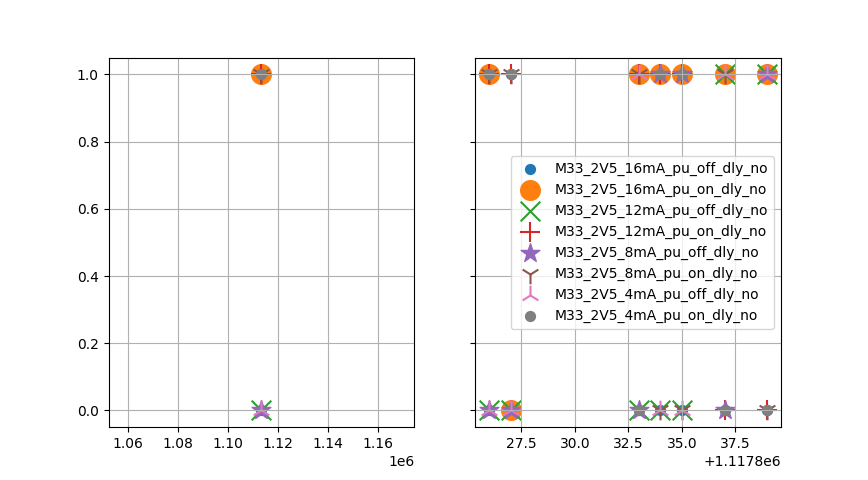

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

feat_addrs1 = feat_addrs[feat_addrs < np.mean(feat_addrs)]
feat_addrs2 = feat_addrs[feat_addrs >= np.mean(feat_addrs)]


def MARKERS():
    ms = [".", "o", "x", "+", "*", "1", "2"]
    idx = 0

    while True:
        yield ms[idx]
        idx += 1
        if idx >= len(ms):
            idx = 0


markers = MARKERS()

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat1 = j.get_els(feat_addrs1).astype(int)
    feat2 = j.get_els(feat_addrs2).astype(int)
    marker = next(markers)
    label = jic.replace(".zip", "")
    ax1.scatter(feat_addrs1, feat1, marker=marker, s=200)
    ax2.scatter(feat_addrs2, feat2, marker=marker, s=200, label=label)
    ax2.legend()
    ax1.grid(True)
    ax2.grid(True)

In [9]:
feat_addrs1

array([1113389])